Project: Investigate a Dataset noshow_final_processed

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Convert ScheduledDay and AppointmentDay to datetime objects.

In [5]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [6]:
print(df[['ScheduledDay', 'AppointmentDay']].dtypes)
df[['ScheduledDay', 'AppointmentDay']].head()

ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
dtype: object


,ScheduledDay,AppointmentDay
0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00
1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00
2,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00
3,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00
4,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00


Handle the erroneous -1 age value.

In [7]:
erroneous_age_count = df[df['Age'] < 0].shape[0]
print(f"Removing {erroneous_age_count} records with with age < 0.")

df = df[df['Age'] >= 0]

print(f"New minimum age: {df['Age'].min()}")

Removing 1 records with with age < 0.
New minimum age: 0


Standardize column names

In [8]:
df.rename(columns={
    'Hipertension': 'Hypertension',
    'Handcap': 'Handicap',
    'No-show': 'No_show',
    'PatientId': 'Patient_ID',
    'AppointmentID': 'Appointment_ID'
}, inplace=True)

df.columns = [c.lower() for c in df.columns]
print(df.columns)

Index(['patient_id', 'appointment_id', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hypertension',
       'diabetes', 'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')


Calculate the Waiting Time (days between booking and appointment)

In [9]:
df['waiting_days'] = (df['appointmentday'].dt.normalize() - df['scheduledday'].dt.normalize()).dt.days
df = df[df['waiting_days'] >= 0]

df['day_of_week'] = df['appointmentday'].dt.day_name()
df.head()

,patient_id,appointment_id,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_days,day_of_week
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday


In [10]:
# Convert 'no_show' to a numeric value: 1 for 'Yes' (did not show), 0 for 'No' (showed up)
df['no_show_num'] = df['no_show'].apply(lambda x: 1 if x == 'Yes' else 0)

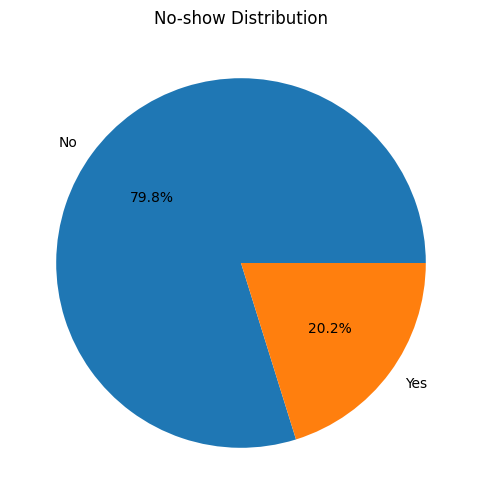

In [11]:
# --- A. Pie Chart: Overall Distribution ---

ax1 = df['no_show'].value_counts().plot(
    kind='pie', 
    autopct='%1.1f%%', 
    title='No-show Distribution',
    figsize=(6, 6)
)
ax1.set_ylabel('')
ax1.figure.savefig('no_show_pie.png')

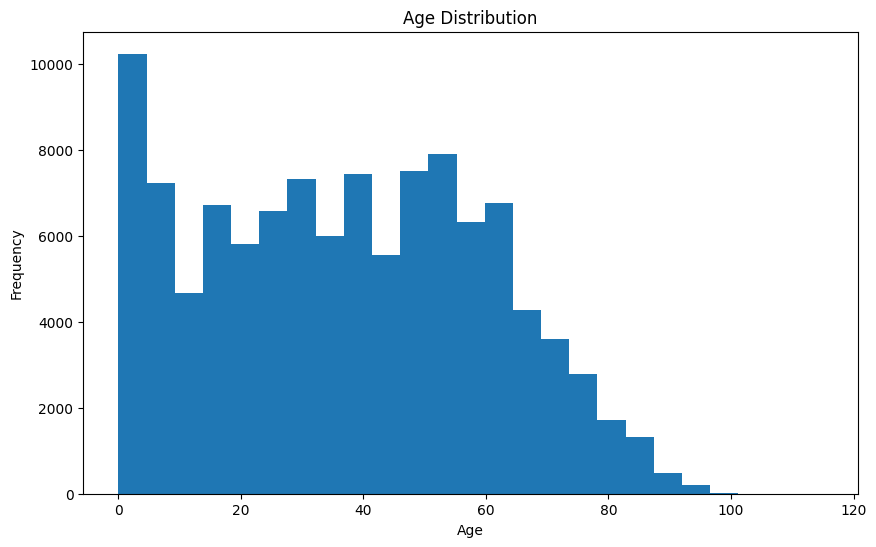

In [12]:
# --- B. Age Distribution (Histogram) ---
ax2 = df['age'].plot(
    kind='hist', 
    bins=25, 
    title='Age Distribution', 
    figsize=(10, 6)
)
ax2.set_xlabel('Age')
ax2.figure.savefig('age_hist.png')

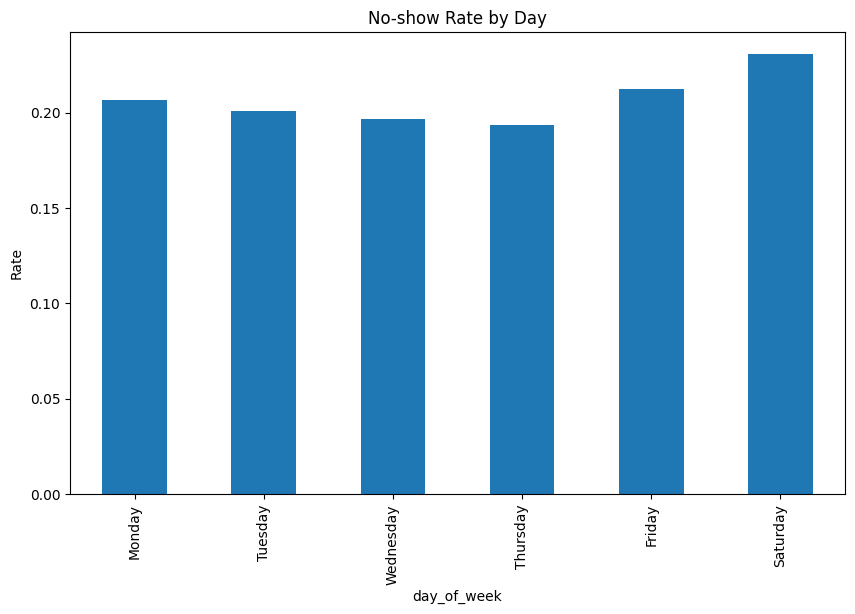

In [13]:
# --- C. No-show Rate by Day of Week (Bar Chart) ---
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
ax3 = df.groupby('day_of_week')['no_show_num'].mean().reindex(day_order).plot(
    kind='bar', 
    title='No-show Rate by Day', 
    figsize=(10, 6)
)
ax3.set_ylabel('Rate')
ax3.figure.savefig('day_rate_bar.png')

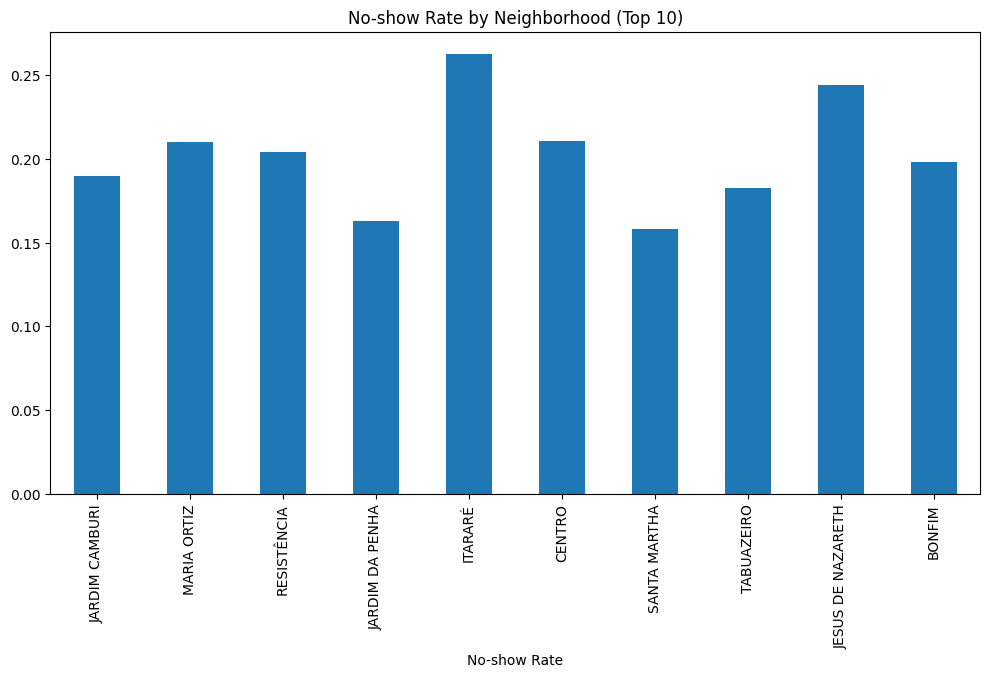

In [14]:
# Neighborhood Visualization (Top 10)

top_neighborhoods = df['neighbourhood'].value_counts().nlargest(10).index
ax4 = df[df['neighbourhood'].isin(top_neighborhoods)].groupby('neighbourhood')['no_show_num'].mean().reindex(top_neighborhoods).plot(
    kind='bar', 
    title='No-show Rate by Neighborhood (Top 10)', 
    figsize=(12, 6)
)
ax4.set_xlabel('No-show Rate')
ax4.get_figure().savefig('neighborhood_analysis.png')

In [15]:
df.to_csv('noshow_final_processed.csv', index=False)

Question 1: Overall Attendance
"What is the overall percentage of patients who missed their appointments?"

In [17]:
print(df['no_show'].value_counts())
print(df['no_show'].value_counts(normalize=True) * 100)

no_show
No     88207
Yes    22314
Name: count, dtype: int64
no_show
No     79.810172
Yes    20.189828
Name: proportion, dtype: float64


Question 2: The Age Trend
"Does a patient's age influence their likelihood of showing up?"

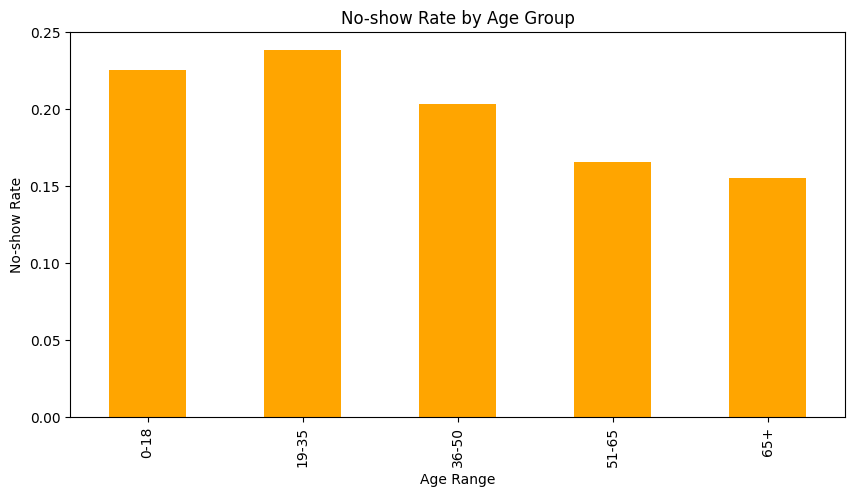

In [18]:
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

ax = df.groupby('age_group', observed=True)['no_show_num'].mean().plot(
    kind='bar', 
    figsize=(10, 5), 
    title='No-show Rate by Age Group',
    color='orange'
)
ax.set_ylabel('No-show Rate')
ax.set_xlabel('Age Range')
ax.get_figure().savefig('age_viz.png')

In [19]:
df.head()

,patient_id,appointment_id,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,waiting_days,day_of_week,no_show_num,age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday,0,51-65
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday,0,51-65
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday,0,51-65
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday,0,0-18
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday,0,51-65


In [16]:
!python -m nbconvert --to html project.ipynb

[NbConvertApp] Converting notebook project.ipynb to html
[NbConvertApp] Writing 277437 bytes to project.html
